In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from scipy.stats import loguniform
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customerchurn/customerChurn.csv


In [32]:
# Read the updated dataframe and display the first 5 rows
df = pd.read_csv("/kaggle/input/customerchurn/customerChurn.csv")
df.head() 

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [33]:
# Check for null values in the dataset
df.isnull().sum() 

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [34]:
# Remove duplicate records and display
df = df.drop_duplicates()
df.head() 

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [35]:
# Drop columns that won't be used in the analysis or modeling
data = df.drop(columns=['Customer ID', 'Total Refunds', 'Zip Code', 'Latitude', 'Longitude' ,'Churn Category','Churn Reason', 'Offer'])

In [36]:
# Check the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Number of Referrals                7043 non-null   int64  
 6   Tenure in Months                   7043 non-null   int64  
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  6361 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [37]:
# Filter out rows where Customer Status is 'Joined'
data = data[data['Customer Status'] != 'Joined']

In [38]:
# Check if 'Joined' has properly been filtered out
data['Customer Status'].unique()

array(['Stayed', 'Churned'], dtype=object)

In [40]:
# Encode binary categorical columns using Label Encoding
binary_columns = ['Gender', 'Married', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
                  'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                  'Streaming Music', 'Unlimited Data', 'Paperless Billing', 'City', 'Internet Service', 
                  'Internet Type', 'Contract', 'Payment Method']
label_encoder = LabelEncoder()
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [41]:
# Check if the datatype of the columns above have been converted 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   int64  
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   int64  
 3   Number of Dependents               6589 non-null   int64  
 4   City                               6589 non-null   int64  
 5   Number of Referrals                6589 non-null   int64  
 6   Tenure in Months                   6589 non-null   int64  
 7   Phone Service                      6589 non-null   int64  
 8   Avg Monthly Long Distance Charges  5945 non-null   float64
 9   Multiple Lines                     6589 non-null   int64  
 10  Internet Service                   6589 non-null   int64  
 11  Internet Type                      6589 non-null   int64  
 1

In [42]:
# Encode the Customer Status column to binary
data['Customer Status'] = data['Customer Status'].map({'Stayed': 0, 'Churned': 1})

In [43]:
# Check to see if the Customer Status column has properly been converted to binary
data['Customer Status'].unique()

array([0, 1])

In [44]:
# Define features and target columns
features = data.drop('Customer Status', axis=1).columns
target = 'Customer Status'

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6589 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   int64  
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   int64  
 3   Number of Dependents               6589 non-null   int64  
 4   City                               6589 non-null   int64  
 5   Number of Referrals                6589 non-null   int64  
 6   Tenure in Months                   6589 non-null   int64  
 7   Phone Service                      6589 non-null   int64  
 8   Avg Monthly Long Distance Charges  5945 non-null   float64
 9   Multiple Lines                     6589 non-null   int64  
 10  Internet Service                   6589 non-null   int64  
 11  Internet Type                      6589 non-null   int64  
 1

In [46]:
# Normalize the float datatypes
numeric_columns = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges',
                  'Total Long Distance Charges', 'Total Revenue']

scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [47]:
# Drop null records
data = data.dropna()

In [48]:
# Check for null values in the dataset
data.isnull().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Number of Referrals                  0
Tenure in Months                     0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges            

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [51]:
# Create an array to hold all models to be used
# Create 2 empty dataframes to hold model names and accuracy
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

In [52]:
filterwarnings('ignore')

In [53]:
# Train and evaluate each model
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

Logistic Regression accuracy: 0.83
K-Nearest Neighbors accuracy: 0.73
Support Vector Machine accuracy: 0.74
Decision Tree accuracy: 0.81
Random Forest accuracy: 0.85
Gradient Boosting accuracy: 0.86
AdaBoost accuracy: 0.83
Gaussian Naive Bayes accuracy: 0.79
XGBoost accuracy: 0.85
CatBoost accuracy: 0.86


In [55]:
# Create a logistic regression model
model = CatBoostClassifier(silent = True)

In [56]:
# Train the model
model.fit(X_train, y_train)

In [57]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 1 0 1 0 0 0 0 1 0 0 

In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC-AUC Score: {roc_auc}')

Accuracy: 0.8610206297502715
Precision: 0.8251748251748252
Recall: 0.7515923566878981
ROC-AUC Score: 0.8346100168941962


In [59]:
# Create a Confusion Matrix based on the results
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[557  50]
 [ 78 236]]


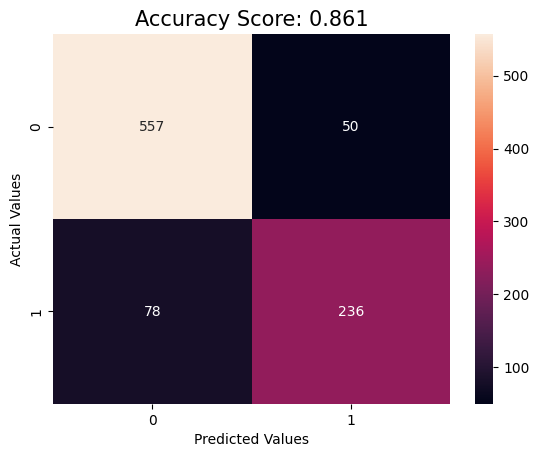

In [60]:
# Vizualizing the confusion matrix 
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [63]:
# Model accuracies
models = [
    'Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 
    'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'AdaBoost', 'Gaussian Naive Bayes', 'XGBoost', 'CatBoost'
]
accuracies = [
    0.83, 0.73, 0.74, 0.81, 0.85, 0.86, 0.83, 0.79, 0.85, 0.86
]


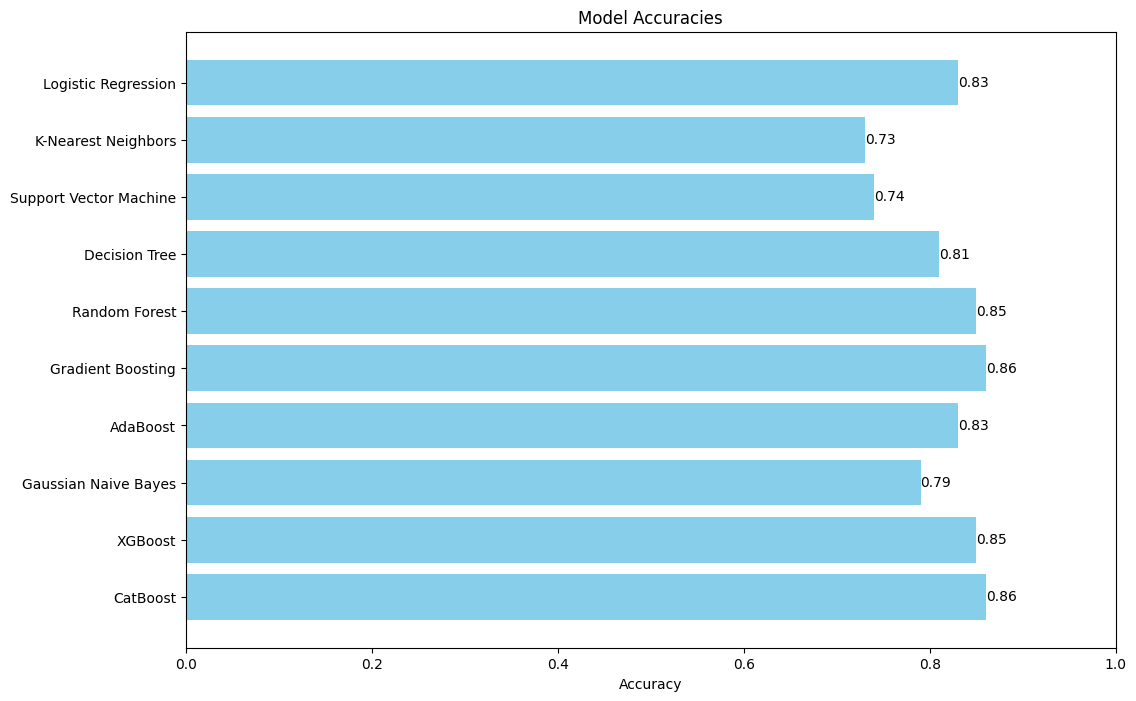

In [64]:
# Vizualizing the accuracies using a bar chart
plt.figure(figsize=(12, 8))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0, 1)

# Display accuracy values on the bars
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy on top
plt.show()
